In [1]:
import pandas
import utils

df = pandas.read_csv("../data/survey2024_headersandcommascleaned_recleaned.csv")

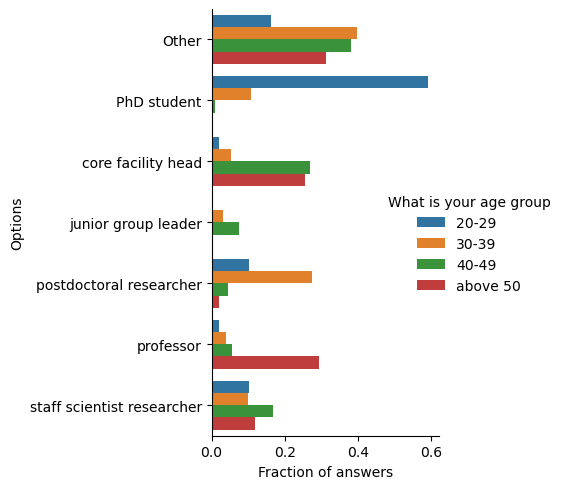

In [2]:
more_than_5_answers = ['PhD student','staff scientist researcher','core facility head','postdoctoral researcher','professor','junior group leader']

utils.select_all_that_apply_hist_facet(df,
                                       'Which of these describe your position Choose all options that apply',
                                       '../figures/PositionByAge',
                                       facet_col="What is your age group",
                                       create_other=more_than_5_answers,
                                       how='color')

C:\Users\marce\Documents\Agus\Survey_2024\.pixi\envs\default\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


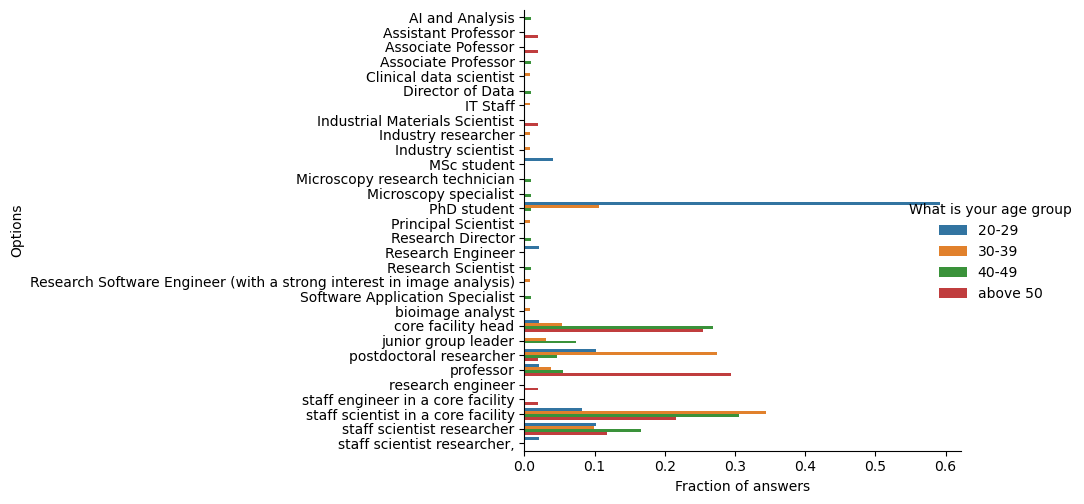

In [3]:
utils.select_all_that_apply_hist_facet(df,
                                       'Which of these describe your position Choose all options that apply',
                                       '../figures/PositionByAge_noothers',
                                       facet_col="What is your age group",
                                       how='color')

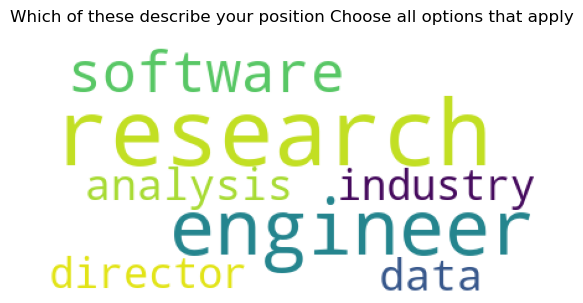

In [4]:
stop_words = []
for x in more_than_5_answers:
    stop_words += x.split(' ')

utils.wordcloud_func(df=df,col_name='Which of these describe your position Choose all options that apply',
                     new_stop_list=stop_words,plot_filename='../figures/PositionsOtherAnswers.png'
)

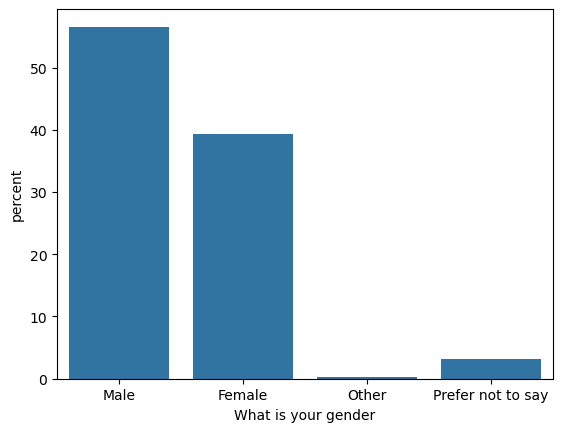

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='What is your gender',stat='percent',order = ["Male", "Female", "Other", "Prefer not to say"])
plt.savefig('../figures/gender_percent.png')
plt.savefig('../figures/gender_percent.svg')

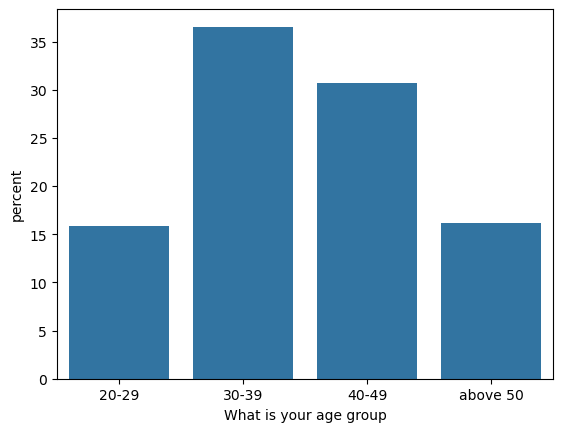

In [6]:
sns.countplot(data=df,x='What is your age group',stat='percent',order=["20-29","30-39","40-49","above 50"])
plt.savefig('../figures/age_percent.png')
plt.savefig('../figures/age_percent.svg')

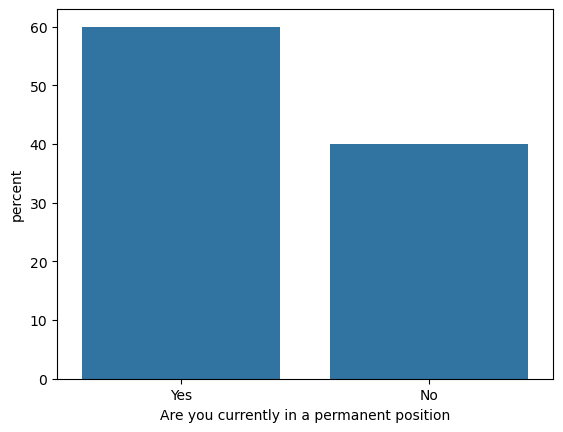

In [7]:
sns.countplot(data=df,x='Are you currently in a permanent position',stat='percent',order=["Yes","No"])
plt.savefig('../figures/permanent_percent.png')
plt.savefig('../figures/permanent_percent.svg')

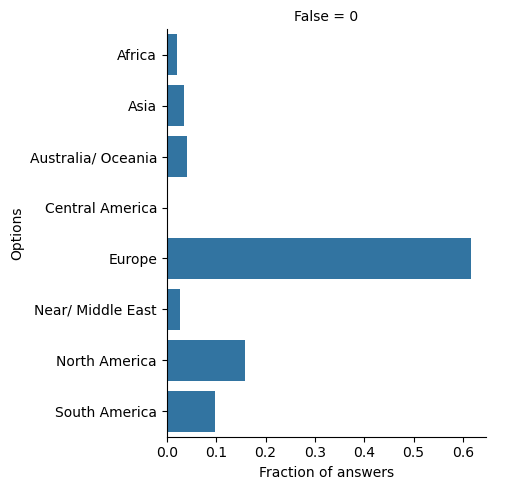

In [8]:
utils.select_all_that_apply_hist_facet(df,
                                       'What is your location',
                                       '../figures/Continent_bar',)

The parsing of the regions can change depending on specific considerations. Feel free to modify the function below accordingly.

In [9]:
def parse_north_vs_south(x):
    if x in ['North America','Central America','Europe']:
        return 'North'
    elif x in ['Middle East', 'Africa','Asia', 'Australia/ Oceania', 'South America', 'Near/ Middle East']:
        return 'South'
    else:
        return x

In [10]:
df["Outside North America/Europe"] = df["What is your location"].apply(lambda loc: parse_north_vs_south(loc))

After applying the parsing, check that the unique values agree with what you expected. This way you will notice if you are missing specific regions or NaNs that have not been filtered out yet.

In [11]:
print(df["Outside North America/Europe"].unique())

['North' 'South' '']


We can filter out the NaNs with the `dropna` method of the DataFrame.

Total entries: 290


Outside North America/Europe
North    225
South     64
           1
Name: count, dtype: int64
Outside North America/Europe  Q13 If there was a society such as GloBIAS advocating Bioimage Analysis BIA and offering events as discussed above Q10 would you be interested to be an active member by helping to organise and run regular online events for GloBIAS
                                                                                                                                                                                                                                                                          1
North                         Yes                                                                                                                                                                                                                                       122
                              No                                                        

<Axes: xlabel='Outside North America/Europe'>

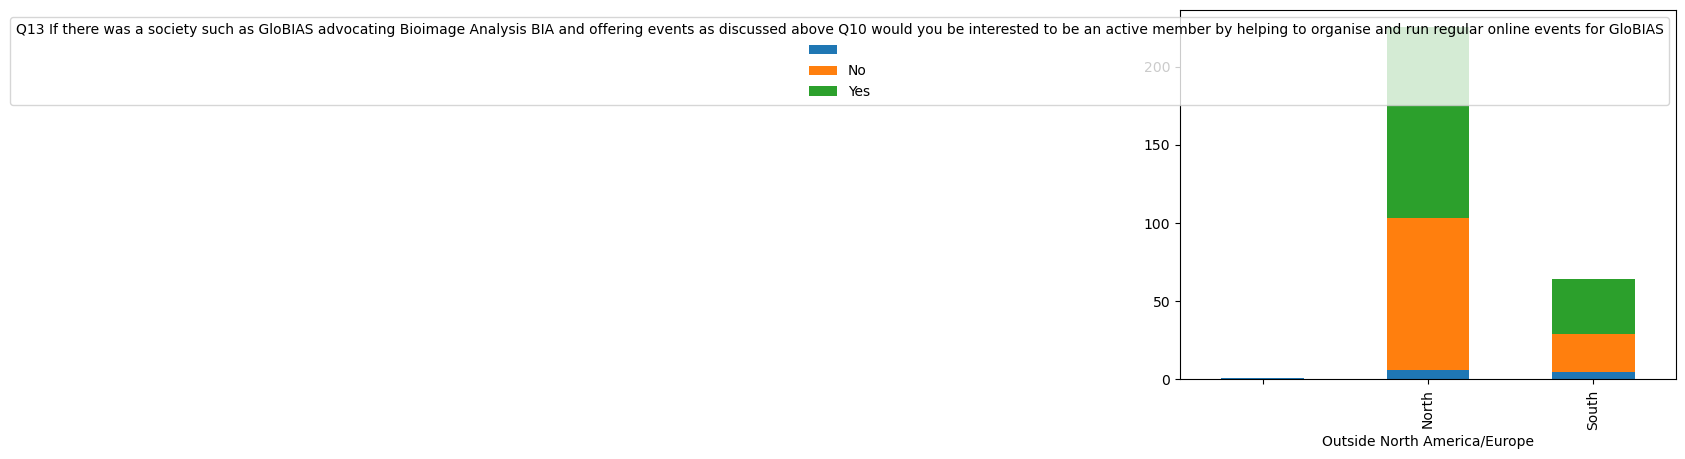

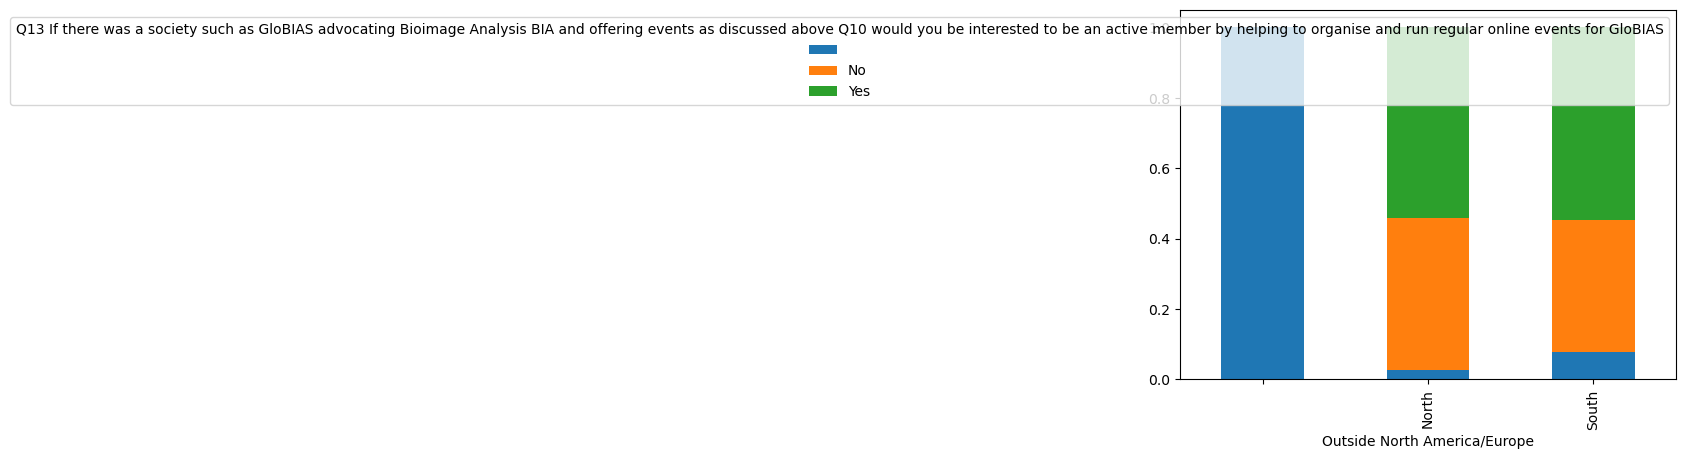

In [12]:
willingness_question = "Q13 If there was a society such as GloBIAS advocating Bioimage Analysis BIA and offering events as discussed above Q10 would you be interested to be an active member by helping to organise and run regular online events for GloBIAS"
cleaned = df[["What is your location", 
              "Outside North America/Europe",
              willingness_question]].dropna()

print("Total entries:", len(cleaned["What is your location"]))

print("\n")

print(cleaned["Outside North America/Europe"].value_counts())

print(cleaned.groupby("Outside North America/Europe")[willingness_question].value_counts())

df.groupby("Outside North America/Europe")[willingness_question].value_counts().unstack().plot(kind='bar',stacked=True)

df.groupby("Outside North America/Europe")[willingness_question].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

What about having it per continent?

Q13 If there was a society such as GloBIAS advocating Bioimage Analysis BIA and offering events as discussed above Q10 would you be interested to be an active member by helping to organise and run regular online events for GloBIAS       \
What is your location                                                                                                                                                                                                                         
                                                                                                                                                                                                                                        1.0   
Africa                                                                                                                                                                                                                                  NaN   
Asia                                        

<Axes: xlabel='What is your location'>

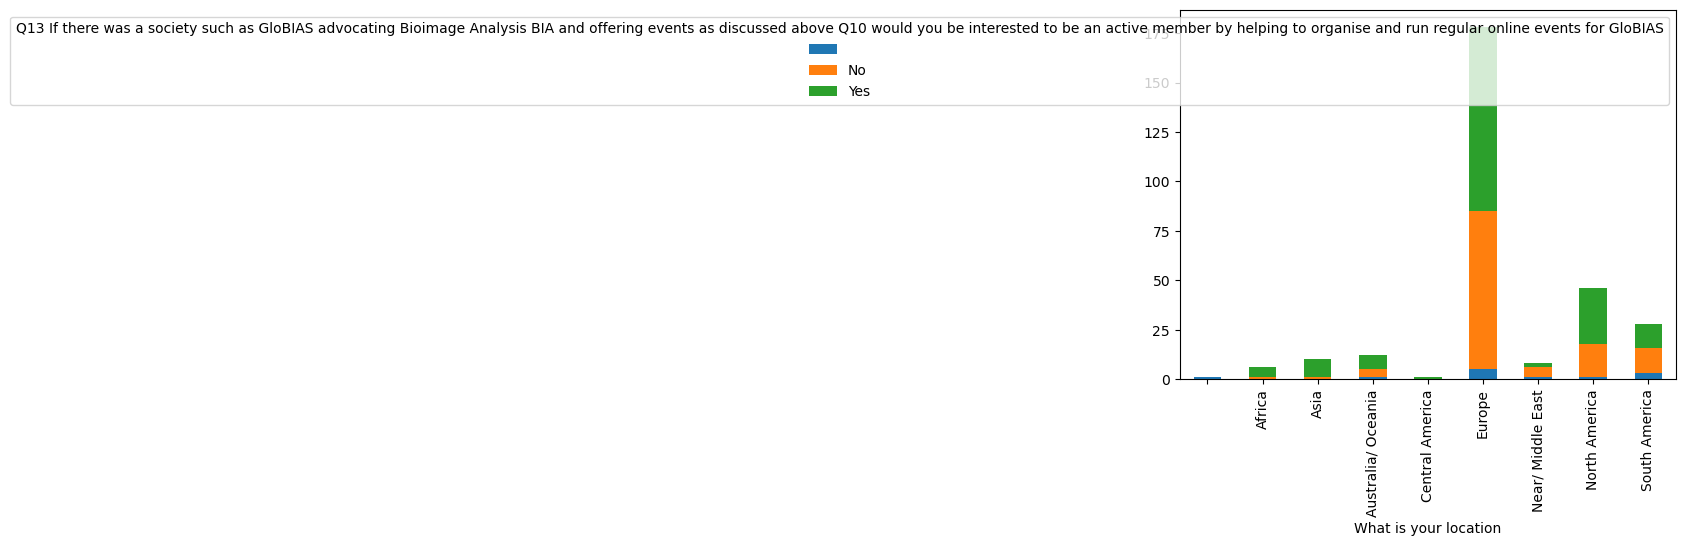

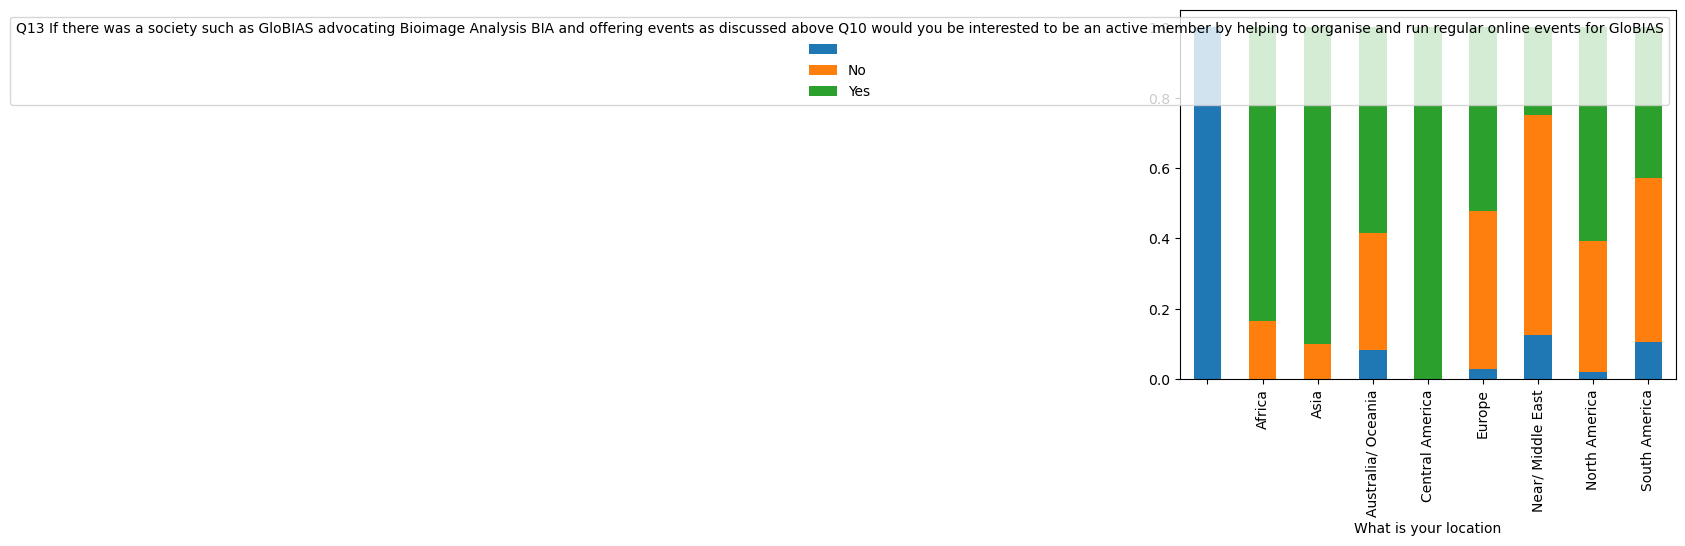

In [13]:
print(cleaned.groupby("What is your location")[willingness_question].value_counts().unstack())

print(cleaned.groupby("What is your location")[willingness_question].value_counts(normalize=True).unstack())

cleaned.groupby("What is your location")[willingness_question].value_counts().unstack().plot(kind='bar',stacked=True)

cleaned.groupby("What is your location")[willingness_question].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

Q13 If there was a society such as GloBIAS advocating Bioimage Analysis BIA and offering events as discussed above Q10 would you be interested to be an active member by helping to organise and run regular online events for GloBIAS    No  \
What is your location                                                                                                                                                                                                                          
Africa                                                                                                                                                                                                                                   1.0   
Asia                                                                                                                                                                                                                                     1.0   
Australia/ Oceania                      

<Axes: xlabel='What is your location'>

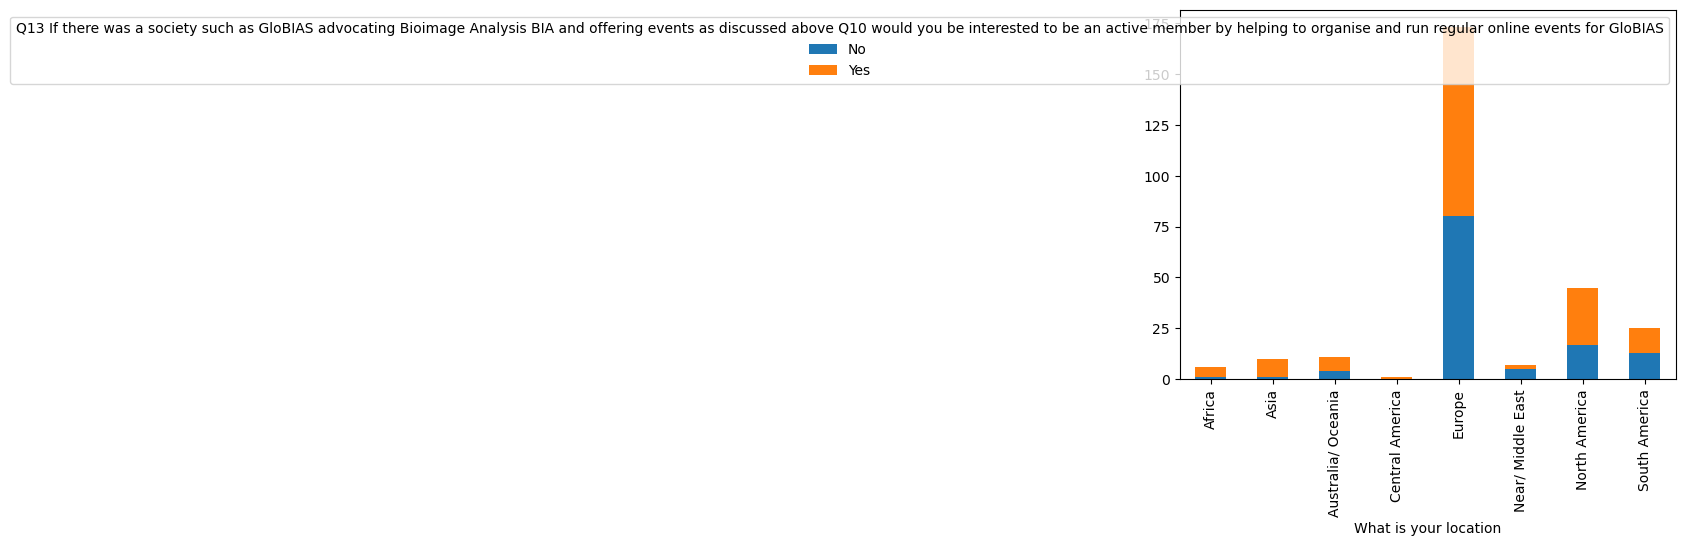

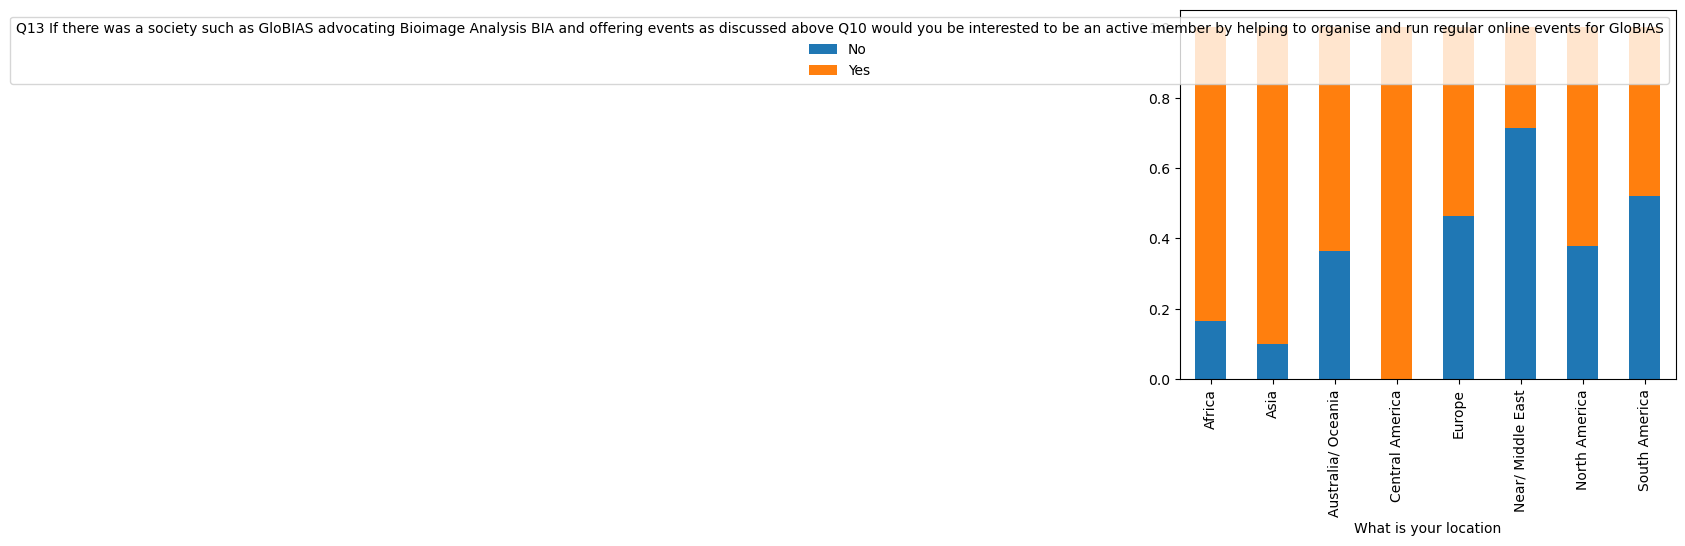

In [14]:
recleaned = cleaned.drop(
    index = cleaned[cleaned[willingness_question] == ''].index
)

print(recleaned.groupby("What is your location")[willingness_question].value_counts().unstack())

print(recleaned.groupby("What is your location")[willingness_question].value_counts(normalize=True).unstack())

recleaned.groupby("What is your location")[willingness_question].value_counts().unstack().plot(kind='bar',stacked=True)

recleaned.groupby("What is your location")[willingness_question].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

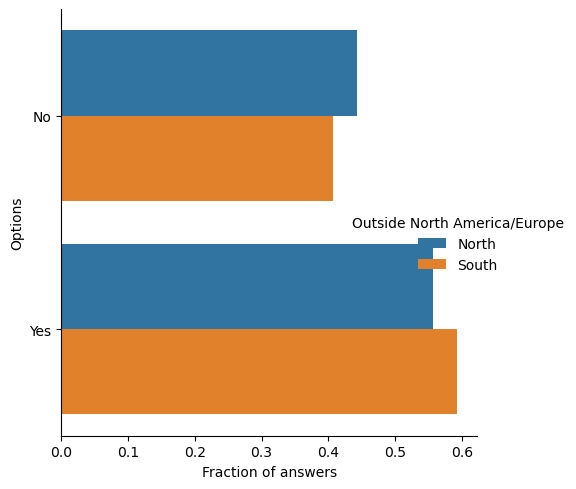

In [15]:
utils.select_all_that_apply_hist_facet(df,
                                       'Q13 If there was a society such as GloBIAS advocating Bioimage Analysis BIA and offering events as discussed above Q10 would you be interested to be an active member by helping to organise and run regular online events for GloBIAS',
                                       '../figures/willing_to_organise_events',
                                       facet_col="Outside North America/Europe",
                                       drop_empty=True,
                                       how='color')